In [117]:
%matplotlib widget
import numpy as np
from arch import arch_model
import statsmodels.api as sm
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

## 1.1. Autoregressive Integrated Moving Average (ARIMA)
An ARIMA model is commonly used for time series forecasting. It uses a combination of autoregression (AR), differencing (I for "Integrated"), and moving average (MA) to model time series data. This model is effective for capturing trends, seasonality, and noise in financial data.

The **ARIMA** model combines three components:
- **AR** (Autoregressive): The output depends linearly on previous values.
- **I** (Integrated): Differences between successive observations are used to make the series stationary.
- **MA** (Moving Average): The output depends linearly on the previous forecast errors.

#### ARIMA(p, d, q) Model:
- \( p \): The number of autoregressive terms (lags).
- \( d \): The degree of differencing (how many times the data needs to be differenced to become stationary).
- \( q \): The number of lagged forecast errors.

Mathematically:
$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t
$$
Where:
- \( \phi \): AR coefficients
- \( \theta \): MA coefficients
- \( \epsilon_t \): Error term at time \( t \)

---

In [118]:
def generate_arima_data(order=(1, 1, 1), steps=1000):
    """
    Generates a synthetic time series using the ARIMA model.
    
    Parameters:
    - order: tuple
        The (p, d, q) order of the ARIMA model.
        p: number of autoregressive terms.
        d: number of differences.
        q: number of moving average terms.
    - steps: int
        Number of time steps to generate.
    
    Returns:
    - arima_data: np.array
        Generated ARIMA time series data.
    """
    # Generate random noise to simulate white noise
    np.random.seed(0)
    noise = np.random.normal(0, 1, steps)
    
    # Fit ARIMA model with given parameters
    arima_model = sm.tsa.ArmaProcess.from_coeffs(order[0], order[2])
    arima_data = arima_model.generate_sample(steps)
    
    return arima_data

## 1.2. Brownian Motion
Brownian motion is widely used in finance to model stock prices and is similar to a random walk but with continuous changes. It captures the inherent randomness and unpredictability in financial markets.


**Brownian motion**, also known as **Wiener Process**, describes a continuous-time stochastic process where changes in value are normally distributed with a mean of zero and a variance that increases with time.

#### Mathematical Formulation:
Brownian motion \( B(t) \) at time \( t \) is characterized by:
$$
B(t) = B(0) + \int_0^t \sigma dW(s)
$$
Where:
- \( B(0) = 0 \): Initial value.
- \( \sigma \): Volatility or standard deviation of the process.
- \( W(t) \): Wiener process, a continuous-time stochastic process with independent increments.

Key properties:
- \( B(t) - B(s) \sim \mathcal{N}(0, \sigma^2 (t - s)) \) for \( t > s \)
- The expected value \( \mathbb{E}[B(t)] = 0 \)
- The variance \( 	ext{Var}(B(t)) = \sigma^2 t \)

---

In [119]:
def generate_brownian_motion(steps=1000, drift=0.001, volatility=0.05):
    """
    Generates a Brownian motion time series with drift and volatility.
    
    Parameters:
    - steps: int
        Number of time steps to generate.
    - drift: float
        The expected drift per step.
    - volatility: float
        The standard deviation of random noise (volatility).
    
    Returns:
    - brownian_motion: np.array
        Generated Brownian motion time series.
    """
    time = np.arange(steps)
    # Simulate Brownian motion with drift
    brownian_motion = np.cumsum(np.random.normal(drift, volatility, steps))
    
    return brownian_motion

## 1.3. GARCH (Generalized Autoregressive Conditional Heteroskedasticity)
The GARCH model is used to model time series data where volatility changes over time, which is common in financial markets. It models periods of high and low volatility, making it particularly useful for simulating stock prices, returns, or transaction volume.


**GARCH** models volatility clustering, where periods of high volatility are followed by high volatility, and low volatility is followed by low volatility. It models time-varying volatility by assuming that the variance depends on past squared returns and past variances.

#### GARCH(1, 1) Model:
$$
X_t = \mu + \epsilon_t
$$
$$
\epsilon_t = \sigma_t z_t, \quad z_t \sim \mathcal{N}(0, 1)
$$
$$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$
Where:
- \( \sigma_t^2 \): Conditional variance at time \( t \)
- \( \alpha_0 \): Constant term
- \( \alpha_1 \): Coefficient for lagged squared error
- \( \beta_1 \): Coefficient for lagged variance
- \( z_t \): Standard normal distribution random variable

---

In [120]:
def generate_garch_data(steps=1000):
    """
    Generates time series data using a GARCH(1, 1) model, often used to simulate financial time series.
    
    Parameters:
    - steps: int
        Number of time steps to generate.
    
    Returns:
    - garch_data: np.array
        Generated GARCH time series data.
    """
    # Generate random noise for the GARCH model
    np.random.seed(0)
    random_data = np.random.normal(0, 1, steps)
    
    # Fit a GARCH(1, 1) model to the random data
    garch_model = arch_model(random_data, vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp="off")

    # Forecast the next steps using the fitted model
    forecast = garch_fit.forecast(horizon=steps)

    # Get the conditional volatility (sigma) from the forecast
    garch_data = forecast.variance.values[-1]

    return garch_data


## 1.4. Poisson Process for Transaction Counts
A Poisson process is commonly used to model the number of transactions or events occurring within a fixed period of time. You can use this to simulate transaction counts over time, such as the number of trades per minute.

The **Poisson process** models the number of events occurring in a fixed interval of time or space. It's often used to model counts, such as the number of transactions or arrivals in a system.

#### Mathematical Description:
The number of events \( N(t) \) occurring by time \( t \) follows a Poisson distribution:
$$
P(N(t) = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}
$$
Where:
- \( \lambda \): The rate parameter (expected number of events per unit of time).
- \( t \): The time interval.

Key property: The time between consecutive events follows an exponential distribution with rate \( \lambda \).

---

In [121]:
def generate_poisson_process(lam=5, steps=1000):
    """
    Generates a time series representing a Poisson process (e.g., transaction counts).
    
    Parameters:
    - lam: float
        The rate or expected number of events per time unit (lambda).
    - steps: int
        Number of time steps to generate.
    
    Returns:
    - poisson_data: np.array
        Generated Poisson process data.
    """
    poisson_data = np.random.poisson(lam, steps)
    
    return poisson_data

## 1.5. Seasonal Data with Noise
You can also create seasonal data by combining periodic (e.g., sinusoidal) patterns with random noise. This is useful for modeling data that has a daily, weekly, or yearly cycle, such as sales or demand.

In **seasonal data with noise**, the underlying data exhibits periodicity, and random noise is added to account for deviations from the seasonality. The base pattern often follows a sinusoidal wave, and the noise is typically drawn from a normal distribution.

#### Mathematical Description:
A basic seasonal model can be expressed as:
$$
X_t = A \sin \left( \frac{2 \pi t}{T} \right) + N_t
$$
Where:
- \( A \): Amplitude of the seasonal component.
- \( T \): Period of the seasonality.
- \( N_t \sim \mathcal{N}(0, \sigma^2) \): Random noise term, drawn from a normal distribution with mean 0 and variance \( \sigma^2 \).
  
---

In [122]:
def generate_seasonal_data(steps=1000, seasonality_period=100, noise_std=1.0):
    """
    Generates a seasonal time series with random noise.
    
    Parameters:
    - steps: int
        Number of time steps to generate.
    - seasonality_period: int
        The period of the seasonality (e.g., daily cycle).
    - noise_std: float
        The standard deviation of the added noise.
    
    Returns:
    - seasonal_data: np.array
        Generated seasonal time series with noise.
    """
    time = np.arange(steps)
    seasonal_signal = 10 * np.sin(2 * np.pi * time / seasonality_period)
    noise = np.random.normal(0, noise_std, steps)
    
    seasonal_data = seasonal_signal + noise
    return seasonal_data

## 2. Adding Anomalies
Injects anomalies manually by introducing random spikes or drops at specific points in the data, simulating unusual patterns like sudden market crashes, sharp price increases, or sensor failures. 

- Identify random points in the data where anomalies should be added.
- Modify these points by adding a large spike or drop to simulate the anomaly.

---

In [123]:
def add_anomalies(data, num_anomalies=5, anomaly_factor=5):
    """
    Adds anomalies to a time series by injecting random spikes or dips.
    
    Parameters:
    - data: np.array
        The original time series data.
    - num_anomalies: int
        Number of anomalies to add.
    - anomaly_factor: float
        The factor by which to increase or decrease the value at anomaly points.
    
    Returns:
    - data_with_anomalies: np.array
        Time series data with added anomalies.
    """
    if data is None:
        raise ValueError("Data cannot be None.")
    data_with_anomalies = data.copy()
    anomaly_indices = np.random.choice(len(data), num_anomalies, replace=False)
    
    for idx in anomaly_indices:
        # Randomly choose whether it's a spike or dip
        anomaly_type = np.random.choice([1, -1])
        data_with_anomalies[idx] += anomaly_type * anomaly_factor * np.std(data)
    
    return data_with_anomalies


## 3.1. **Z-Score Anomaly Detection**

The **Z-Score** anomaly detection method works by calculating the number of standard deviations a point is away from the mean. If a data point's Z-score exceeds a threshold, it is flagged as an anomaly.

#### Z-Score Formula:
For each data point \( x_i \) in the dataset:
$$
Z_i = \frac{x_i - \mu}{\sigma}
$$
Where:
- \( \mu \): The mean of the dataset.
- \( \sigma \): The standard deviation of the dataset.
- \( Z_i \): The Z-score of the data point \( x_i \).

If \( |Z_i| \) exceeds a certain threshold (commonly 3), the point is considered an anomaly.

---

In [124]:
def detect_anomalies_zscore(data_stream, window_size=50, threshold=3):
    """
    Detects anomalies in a data stream using Z-score-based analysis.
    
    Parameters:
    - data_stream: np.array
        The continuous data stream to be analyzed for anomalies.
    
    - window_size: int, optional (default=50)
        The size of the rolling window used for calculating the moving mean and standard deviation.
    
    - threshold: float, optional (default=3)
        The number of standard deviations above or below the mean to consider as an anomaly.

    Returns:
    - anomalies: list of tuples
        A list of detected anomalies where each entry is a tuple (index, value) indicating the index 
        of the anomaly in the data stream and the corresponding anomalous value.
    """
    # Deque to store a rolling window of data points
    rolling_window = deque(maxlen=window_size)
    
    # List to store detected anomalies
    anomalies = []

    for i, value in enumerate(data_stream):
        # Only calculate Z-score when the rolling window is full
        if len(rolling_window) == window_size:
            mean = np.mean(rolling_window)   # Compute mean of the rolling window
            std_dev = np.std(rolling_window) # Compute standard deviation of the rolling window

            # Calculate the Z-score for the current data point
            z_score = (value - mean) / std_dev if std_dev != 0 else 0

            # If the Z-score exceeds the threshold, mark it as an anomaly
            if abs(z_score) > threshold:
                anomalies.append((i, value))  # Store the index and value of the anomaly
        
        # Add the current value to the rolling window
        rolling_window.append(value)

    return anomalies

def zscore_anomaly_detection_optimized(data_stream, window_size=50, threshold=3):
    """
    Optimized Z-score-based anomaly detection using online calculations.
    """
    rolling_window = deque(maxlen=window_size)
    anomalies = []

    # Initialize rolling statistics
    sum_vals = 0.0
    sum_sq_vals = 0.0

    for i, value in enumerate(data_stream):
        if len(rolling_window) == window_size:
            # Compute mean and std_dev using rolling sums
            mean = sum_vals / window_size
            variance = (sum_sq_vals / window_size) - (mean ** 2)
            std_dev = np.sqrt(variance) if variance > 0 else 0

            z_score = (value - mean) / std_dev if std_dev != 0 else 0

            if abs(z_score) > threshold:
                anomalies.append((i, value))

            # Remove the oldest value from sums
            old_value = rolling_window.popleft()
            sum_vals -= old_value
            sum_sq_vals -= old_value ** 2
        else:
            # If window isn't full yet, just append
            rolling_window.append(value)
            sum_vals += value
            sum_sq_vals += value ** 2
            continue

        # Add the new value to rolling window and sums
        rolling_window.append(value)
        sum_vals += value
        sum_sq_vals += value ** 2

    return anomalies

## 3.2. **EWMA (Exponentially Weighted Moving Average)**

The **EWMA** method tracks the moving average of a time series, giving exponentially more weight to recent observations. This is useful for detecting trends or shifts in the data.

#### EWMA Formula:
The EWMA for time \( t \) is calculated as:
$$
S_t = \alpha X_t + (1 - \alpha) S_{t-1}
$$
Where:
- \( S_t \): The exponentially weighted moving average at time \( t \).
- \( X_t \): The value of the time series at time \( t \).
- \( \alpha \): The smoothing factor, \( 0 < \alpha \leq 1 \). Larger values of \( \alpha \) give more weight to recent observations.

At the initial time \( t = 0 \), the moving average can be initialized as:
$$
S_0 = X_0
$$

### Anomaly Detection:
Anomalies are flagged if the difference between the actual value and the EWMA exceeds a threshold:
$$
|X_t - S_t| > \lambda \cdot \sigma
$$
Where \( \lambda \) is a predefined threshold and \( \sigma \) is the standard deviation of the dataset.

---

In [125]:
def ewma(data_stream, alpha=0.3):
    """
    Compute Exponentially Weighted Moving Average (EWMA).
    
    Parameters:
    - data: list or array of values to smooth.
    - alpha: smoothing factor, determines the weight of recent observations (0 < alpha <= 1).
    
    Returns:
    - smoothed_data: array of smoothed values.
    """
    smoothed_data = np.zeros_like(data_stream)
    smoothed_data[0] = data_stream[0]  # Initialize the first value
    
    for t in range(1, len(data_stream)):
        smoothed_data[t] = alpha * data_stream[t] + (1 - alpha) * smoothed_data[t - 1]
    
    return smoothed_data

def detect_anomalies_ewma(data, alpha=0.3, threshold=3):
    """
    EWMA-based anomaly detection.
    
    Parameters:
    - data: list or array of values.
    - alpha: smoothing factor for EWMA.
    - threshold: the number of standard deviations away from EWMA to flag as an anomaly.
    
    Returns:
    - anomalies: list of (index, value) where anomalies are detected.
    """
    smoothed_data = ewma(data, alpha)
    residuals = np.abs(data - smoothed_data)
    std_dev = np.std(residuals)  # Standard deviation of the residuals
    
    anomalies = []
    for t in range(len(data)):
        if residuals[t] > threshold * std_dev:
            anomalies.append((t, data[t]))
    
    return anomalies

## 3.3. **Seasonal Hybrid Extreme Studentized Deviate (S-H-ESD)**

The **S-H-ESD** method is designed to detect anomalies in time series with seasonal components. It combines seasonal decomposition with the Generalized ESD test.

1. **Seasonal Decomposition**: The time series is decomposed into trend, seasonal, and residual components.
2. **Anomaly Detection on Residuals**: Anomalies are detected in the residual component using the Generalized ESD test.

#### Generalized ESD Test:

The Generalized ESD test is used to detect multiple outliers. It calculates the test statistic \( R_i \) for each observation:
$$
R_i = \frac{\max |X_i - \mu|}{\sigma}
$$
Where:
- \( X_i \): The data point.
- \( \mu \): The mean of the dataset.
- \( \sigma \): The standard deviation.

An observation is flagged as an outlier if its test statistic exceeds a critical value.

The process is repeated, removing the outliers one at a time, until no more outliers are detected.


In [126]:
def sh_esd(data_stream, period, max_anomalies=0.05):
    """
    Seasonal Hybrid Extreme Studentized Deviate (S-H-ESD) anomaly detection.
    
    Parameters:
    - data_stream: np.array
        The continuous data stream to be analyzed for anomalies.
    
    - period: int
        The seasonal period of the data stream (e.g., 24 for daily data with hourly observations).
    
    - max_anomalies: float, optional (default=0.05)
        The maximum percentage of data points that can be detected as anomalies.

    Returns:
    - anomalies: list of tuples
        A list of detected anomalies where each entry is a tuple (index, value) indicating the index 
        of the anomaly in the data stream and the corresponding anomalous value.
    """
    # Convert data to a pandas Series
    data = pd.Series(data_stream)
    
    # Check if we have enough observations for the decomposition
    if len(data) < 2 * period:
        raise ValueError(f"Not enough data for seasonal decomposition. "
                         f"Data length must be at least 2 * period ({2 * period}), but got {len(data)}.")

    try:
        # Decompose the data stream into seasonal, trend, and residual components
        decomposition = seasonal_decompose(data, period=period, model='additive', extrapolate_trend='freq')
    
        # Extract the residual component
        residual = decomposition.resid.dropna()

        # Perform the ESD test on the residuals
        anomalies = perform_esd_test(residual, max_anomalies)
    
    except ValueError as e:
        raise ValueError(f"Error during seasonal decomposition: {e}")

    return anomalies


def perform_esd_test(residuals, max_anomalies):
    """
    Perform the ESD (Extreme Studentized Deviate) test on residuals to detect anomalies.
    
    Parameters:
    - residuals: pd.Series
        The residual component of the decomposed time series.
    
    - max_anomalies: float
        The maximum percentage of data points that can be detected as anomalies.

    Returns:
    - anomalies: list of tuples
        Detected anomalies as (index, value) tuples.
    """
    n = len(residuals)
    max_outliers = int(n * max_anomalies)
    
    anomalies = []
    for i in range(max_outliers):
        mean = residuals.mean()
        std_dev = residuals.std()
        
        # Calculate the modified Z-score for each residual
        z_scores = np.abs((residuals - mean) / std_dev)
        
        # Find the data point with the maximum Z-score
        max_z_score = z_scores.max()
        max_index = z_scores.idxmax()
        
        # Compute the test statistic for ESD
        lambda_value = stats.t.ppf(1 - 0.05 / (2 * (n - i)), df=n - i - 1)
        critical_value = lambda_value * (n - i) / np.sqrt((n - i - 1 + lambda_value**2) * (n - i))
        
        # Check if the maximum Z-score exceeds the critical value (flag as anomaly)
        if max_z_score > critical_value:
            anomalies.append((max_index, residuals[max_index]))
            residuals = residuals.drop(max_index)  # Remove the outlier for next iteration
        else:
            break
    
    return anomalies

## 4. Visualization

- Static Visualization:
    - The static visualization shows the entire time series at once, with the detected anomalies highlighted in red.
    - This visualization helps in identifying how the anomalies are distributed over the entire dataset, providing a clear picture of where the data points deviate from the norm.
-  Real-Time Visualization
    - The real-time visualization dynamically plots the data stream as it is generated, simulating a live data feed.
    - Detected anomalies are highlighted in red as they occur, which is useful for applications that monitor live data (e.g., stock     prices, sensor readings).
    - This type of visualization is particularly useful when dealing with streaming data or systems that need to flag anomalies in real time.

In [127]:
def visualize_anomalies_static(data_stream, anomalies_list, algorithm_name):
    """
    Visualizes the data stream and highlights detected anomalies in a static plot.
    
    Parameters:
    - data_stream: np.array
        The continuous data stream.
    
    - anomalies_list: list of tuples
        A list of detected anomalies from the anomaly detection algorithm.
    
    - algorithm_name: str
        The name of the anomaly detection algorithm used.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the data stream
    ax.plot(data_stream, label='Data Stream')
    
    # Extract anomaly indices and values
    anomaly_x = [idx for idx, _ in anomalies_list]
    anomaly_y = [value for _, value in anomalies_list]
    
    # Highlight anomalies
    ax.scatter(anomaly_x, anomaly_y, color='red', label='Anomalies', zorder=5)
    
    # Add title and labels
    ax.set_title(f'Anomaly Detection using {algorithm_name}')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Value')
    
    # Add a legend
    ax.legend(loc='upper right')
    
    # Display the plot
    plt.show()


In [128]:
def visualize_anomalies_real_time(data_stream, anomalies_list, algorithm_name):
    """
    Visualizes the data stream and highlights detected anomalies.
    
    Parameters:
    - data_stream: np.array
        The continuous data stream.
    
    - anomalies_list: list of tuples
        A list of detected anomalies from the anomaly detection algorithm.
    
    - algorithm_name: str
        The name of the anomaly detection algorithm used.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    x_data = []
    y_data = []
    anomaly_x = [idx for idx, _ in anomalies_list]
    anomaly_y = [value for _, value in anomalies_list]

    def animate(i):
        x_data.append(i)
        y_data.append(data_stream[i])
        ax.clear()
        ax.plot(x_data, y_data, label='Data Stream')
        ax.scatter(anomaly_x, anomaly_y, color='red', label='Anomalies')
        ax.set_title(f'Real-Time Anomaly Detection using {algorithm_name}')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Value')
        ax.legend(loc='upper right')
        ax.set_xlim(0, len(data_stream))
        ax.set_ylim(min(data_stream) - 10, max(data_stream) + 10)

    # Create the animation object and assign it to a variable
    ani = animation.FuncAnimation(fig, animate, frames=len(data_stream), interval=0.1, repeat=False)
    
    # Display the animation
    plt.show()
    
    # Return the animation object to prevent garbage collection
    return ani

## 5. Example Usage

In [129]:
num_data_points = 1000
num_anomalies = 10

## ARIMA

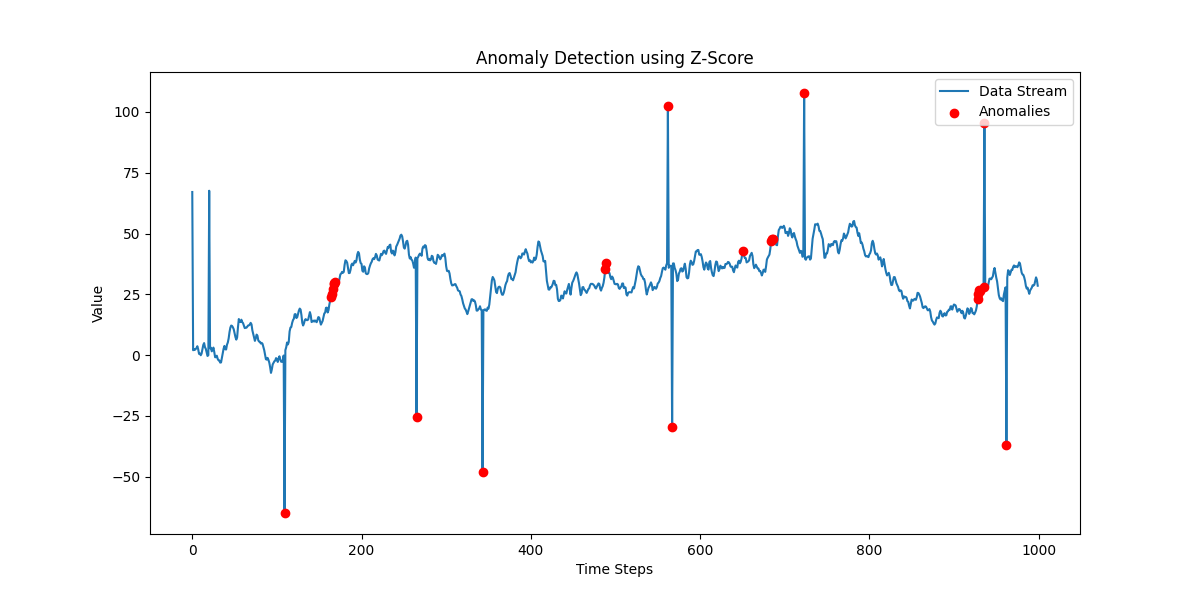

In [130]:
# Generate ARIMA data
arima_data = generate_arima_data(steps=num_data_points)

# Add anomalies to the data
arima_data_with_anomalies = add_anomalies(arima_data, num_anomalies)

# Detect anomalies using Z-Score method
arima_zscore_anoms = detect_anomalies_zscore(arima_data_with_anomalies)

# Visualize the data with anomalies using Z-Score
visualize_anomalies_static(arima_data_with_anomalies, arima_zscore_anoms, "Z-Score")


### Optimized online Z-Score calculation

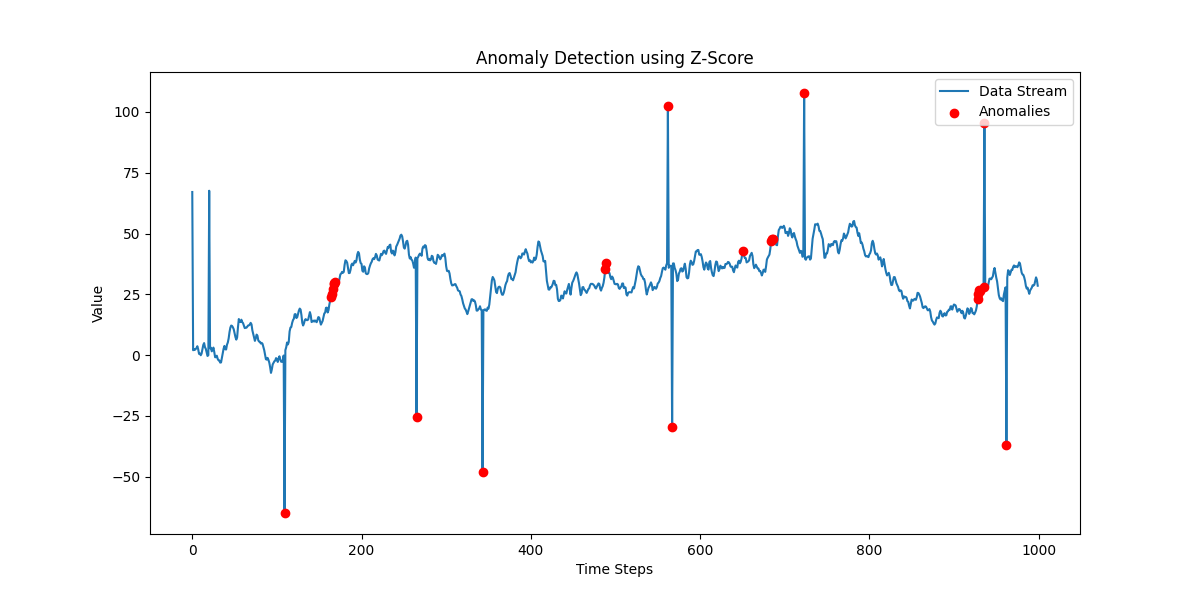

In [150]:
# Detect anomalies using Z-Score method
arima_zscore_anoms_online = zscore_anomaly_detection_optimized(arima_data_with_anomalies)

# Visualize the data with anomalies using Z-Score
visualize_anomalies_static(arima_data_with_anomalies, arima_zscore_anoms_online, "Z-Score")

In [131]:
# # Save the animation object so it's not deleted
# ani = visualize_anomalies(arima_data_with_anomalies, arima_zscore_anoms, "Z-score")

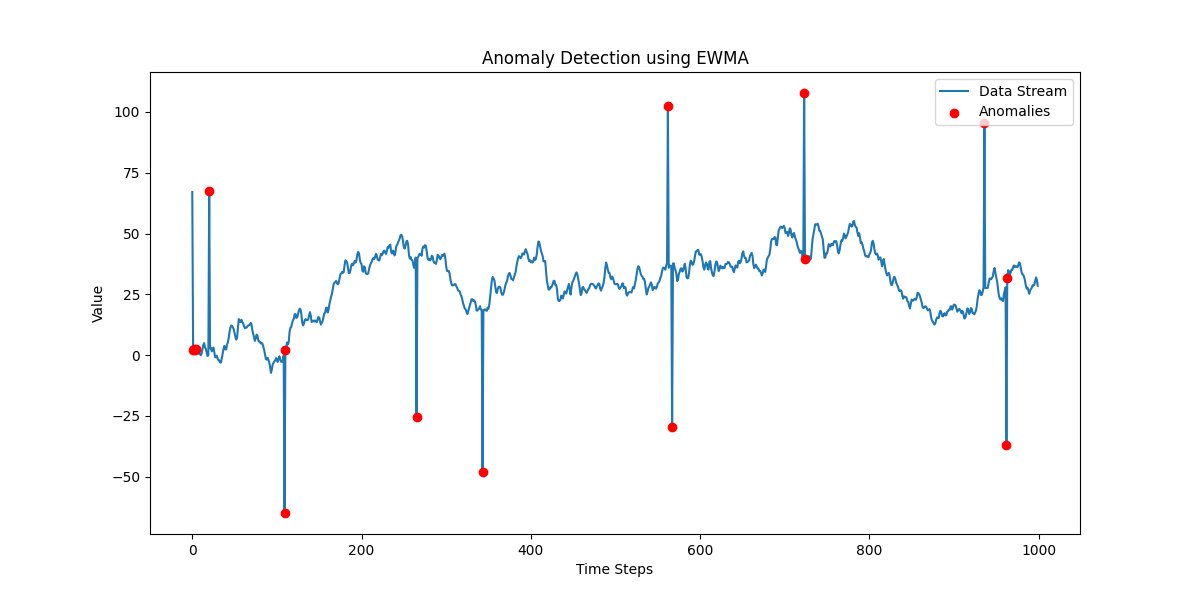

In [132]:
# Detect anomalies using EWMA method
arima_ewma_anoms = detect_anomalies_ewma(arima_data_with_anomalies)

# Visualize the data with anomalies using EWMA
visualize_anomalies_static(arima_data_with_anomalies, arima_ewma_anoms, "EWMA")


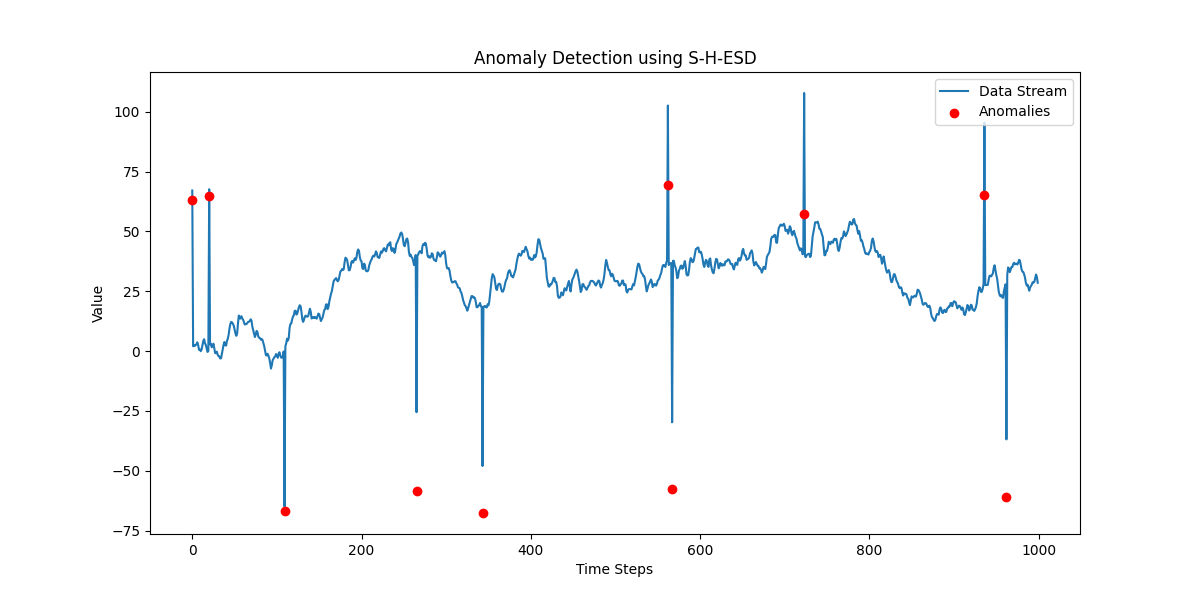

In [133]:
# Detect anomalies using S-H-ESD method
try:
    arima_sh_esd_anoms = sh_esd(arima_data_with_anomalies, period=100, max_anomalies=0.05)
except ValueError as e:
    print(f"Error during S-H-ESD anomaly detection: {e}")
    arima_sh_esd_anoms = []  # Use an empty list or fallback if detection fails

# Visualize the data with anomalies using S-H-ESD
visualize_anomalies_static(arima_data_with_anomalies, arima_sh_esd_anoms, "S-H-ESD")


## Brownian

In [134]:
# Generate Brownian Motion data
brownian_data = generate_brownian_motion(steps=num_data_points)

# Add anomalies to the data
brownian_data_with_anomalies = add_anomalies(brownian_data, num_anomalies)


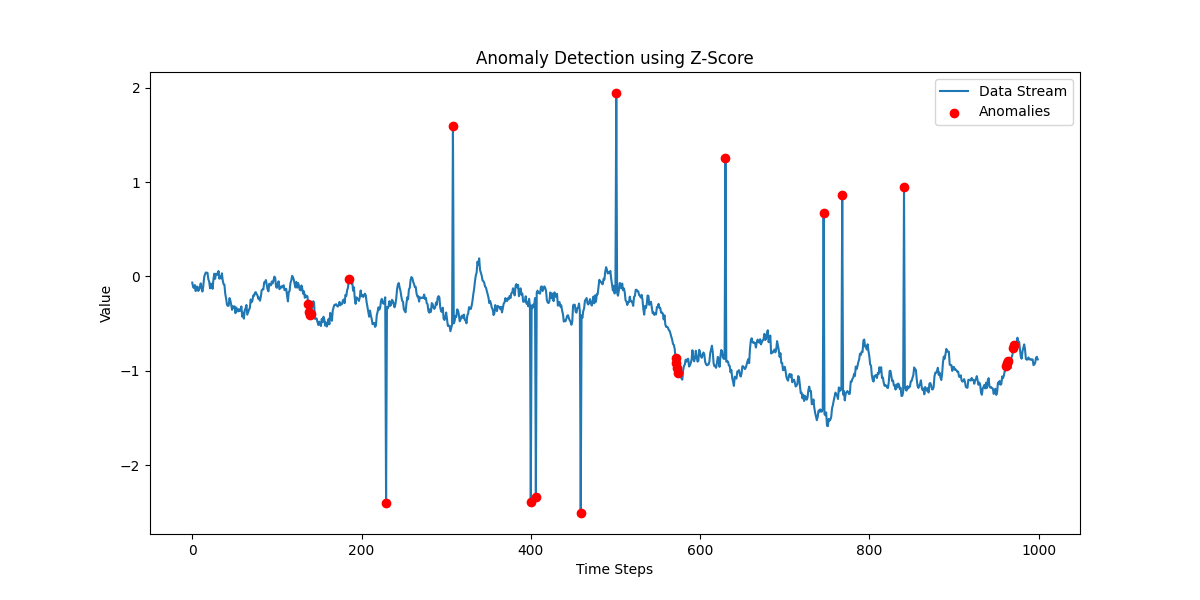

In [135]:
# Detect anomalies using Z-Score method
brownian_zscore_anoms = detect_anomalies_zscore(brownian_data_with_anomalies)

# Visualize the data with anomalies using Z-Score
visualize_anomalies_static(brownian_data_with_anomalies, brownian_zscore_anoms, "Z-Score")

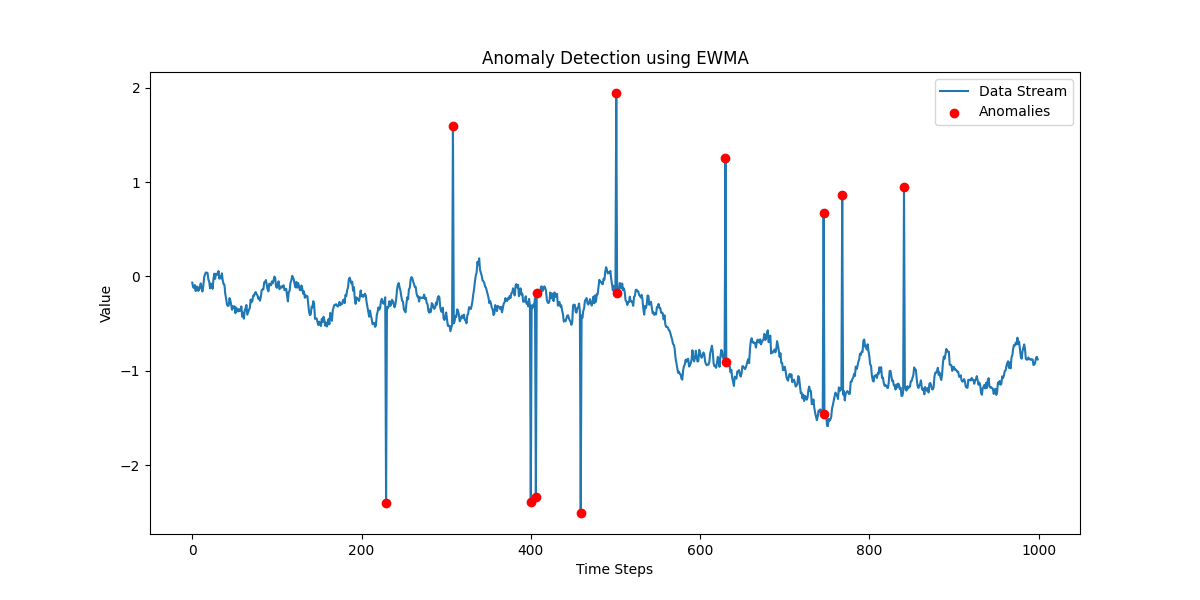

In [136]:
# Detect anomalies using EWMA method
brownian_ewma_anoms = detect_anomalies_ewma(brownian_data_with_anomalies)

# Visualize the data with anomalies using EWMA
visualize_anomalies_static(brownian_data_with_anomalies, brownian_ewma_anoms, "EWMA")


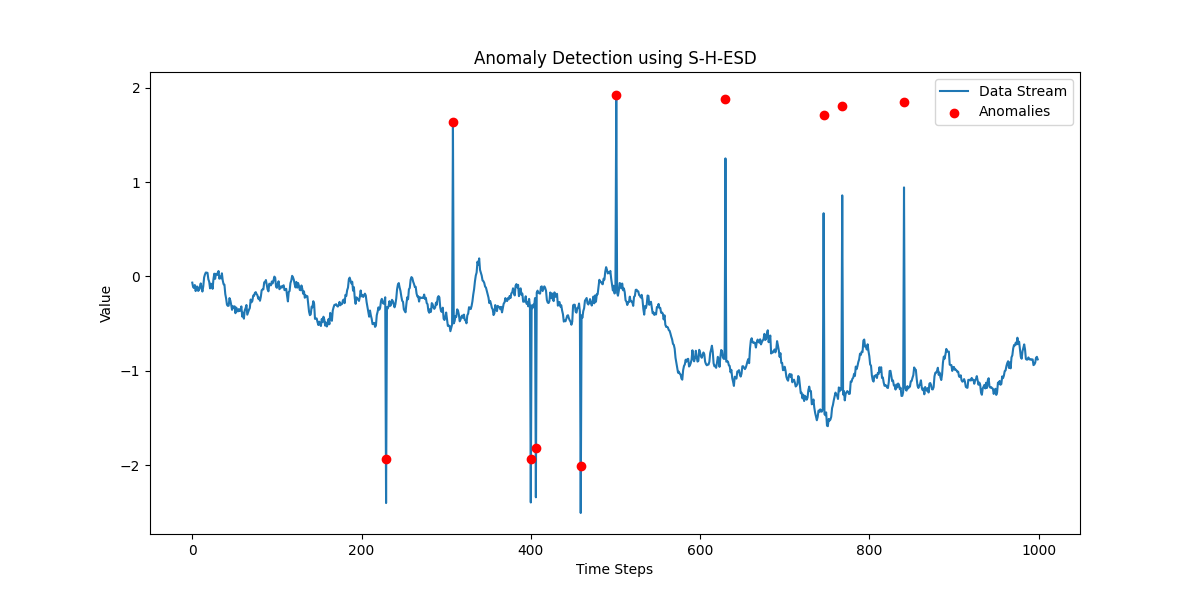

In [137]:
# Detect anomalies using S-H-ESD method
try:
    brownian_sh_esd_anoms = sh_esd(brownian_data_with_anomalies, period=100, max_anomalies=0.05)
except ValueError as e:
    print(f"Error during S-H-ESD anomaly detection: {e}")
    brownian_sh_esd_anoms = []

# Visualize the data with anomalies using S-H-ESD
visualize_anomalies_static(brownian_data_with_anomalies, brownian_sh_esd_anoms, "S-H-ESD")


## GARCH

In [138]:
# Generate GARCH data
garch_data = generate_garch_data(steps=num_data_points)

# Add anomalies to the data
garch_data_with_anomalies = add_anomalies(garch_data, num_anomalies)


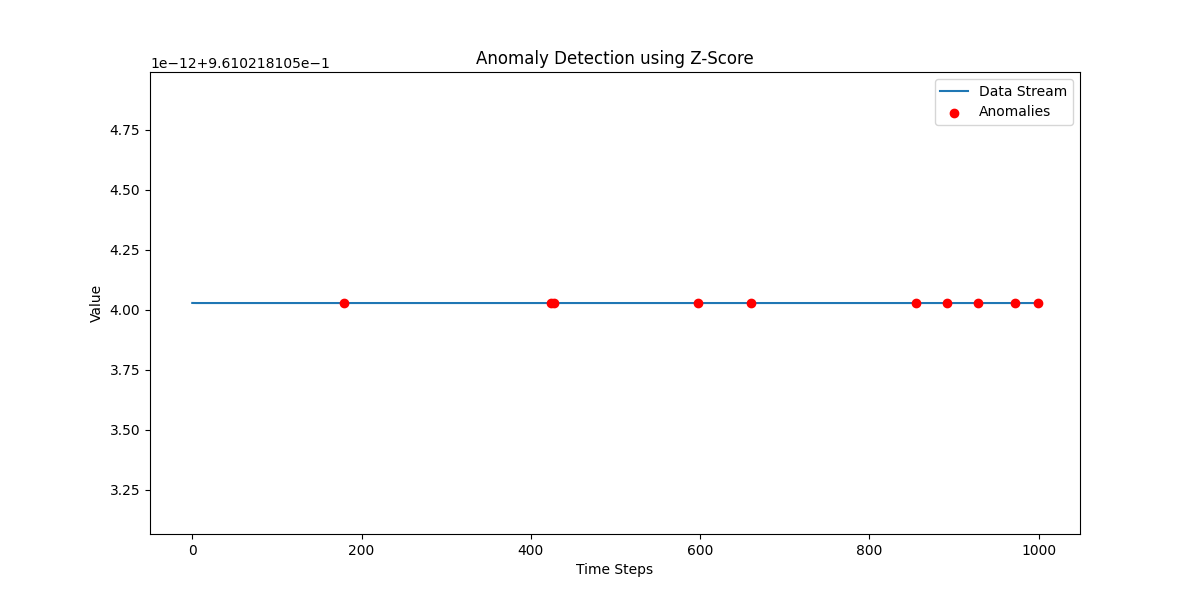

In [139]:
# Detect anomalies using Z-Score method
garch_zscore_anoms = detect_anomalies_zscore(garch_data_with_anomalies)

# Visualize the data with anomalies using Z-Score
visualize_anomalies_static(garch_data_with_anomalies, garch_zscore_anoms, "Z-Score")

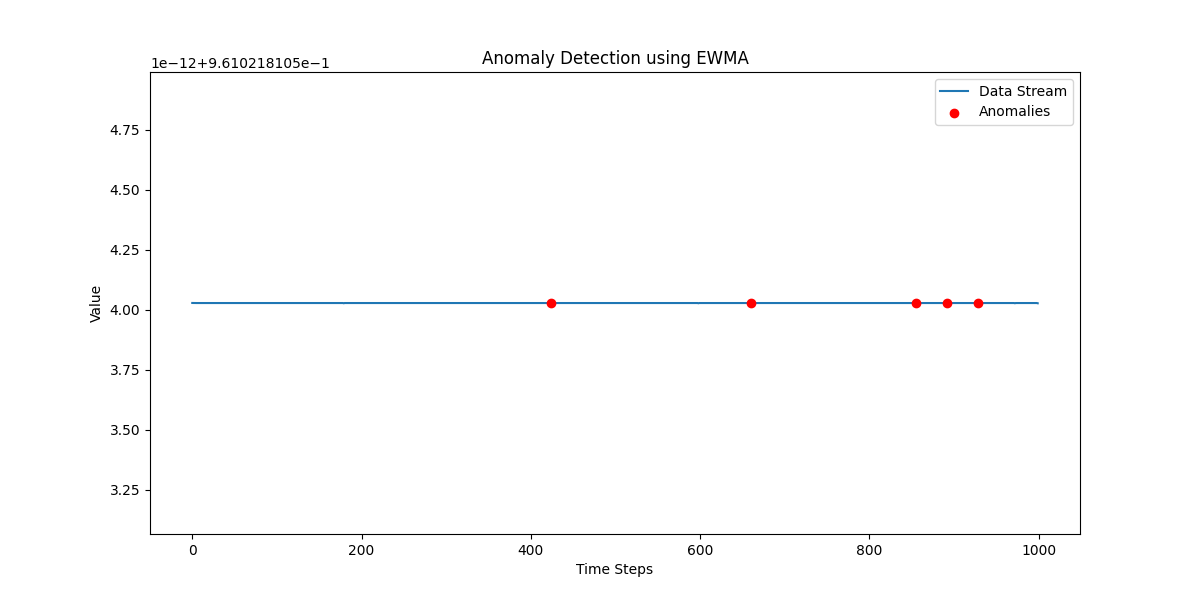

In [140]:
# Detect anomalies using EWMA method
garch_ewma_anoms = detect_anomalies_ewma(garch_data_with_anomalies)

# Visualize the data with anomalies using EWMA
visualize_anomalies_static(garch_data_with_anomalies, garch_ewma_anoms, "EWMA")


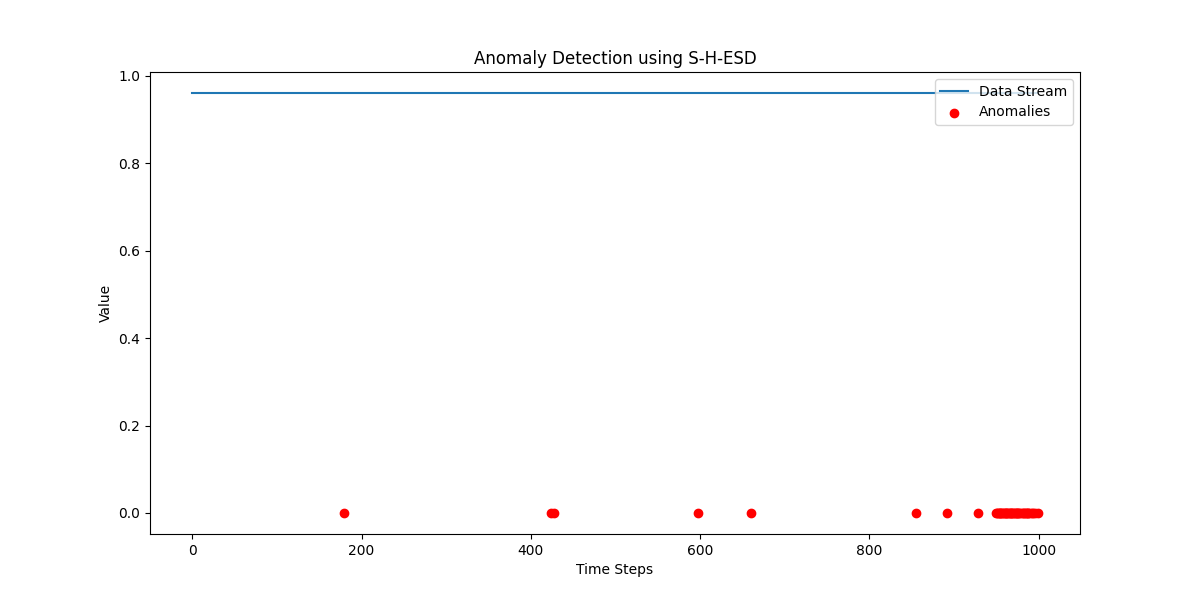

In [141]:
# Detect anomalies using S-H-ESD method
try:
    garch_sh_esd_anoms = sh_esd(garch_data_with_anomalies, period=100, max_anomalies=0.05)
except ValueError as e:
    print(f"Error during S-H-ESD anomaly detection: {e}")
    garch_sh_esd_anoms = []

# Visualize the data with anomalies using S-H-ESD
visualize_anomalies_static(garch_data_with_anomalies, garch_sh_esd_anoms, "S-H-ESD")


## Poisson

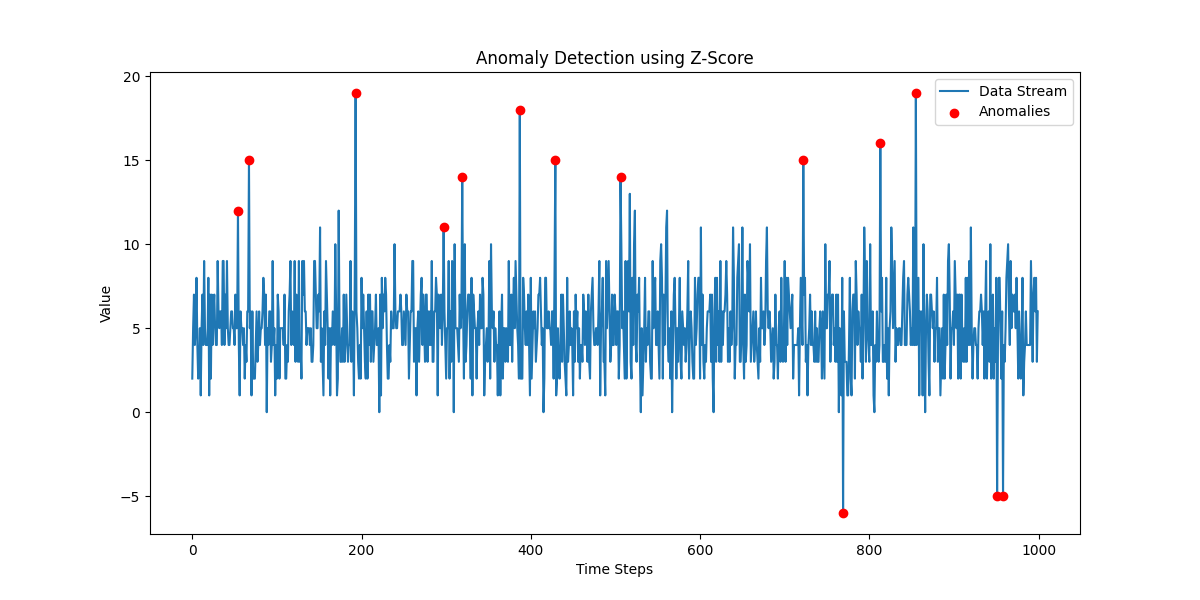

In [142]:
# Generate Poisson Process data
poisson_data = generate_poisson_process(steps=num_data_points)

# Add anomalies to the data
poisson_data_with_anomalies = add_anomalies(poisson_data, num_anomalies)

# Detect anomalies using Z-Score method
poisson_zscore_anoms = detect_anomalies_zscore(poisson_data_with_anomalies)

# Visualize the data with anomalies using Z-Score
visualize_anomalies_static(poisson_data_with_anomalies, poisson_zscore_anoms, "Z-Score")


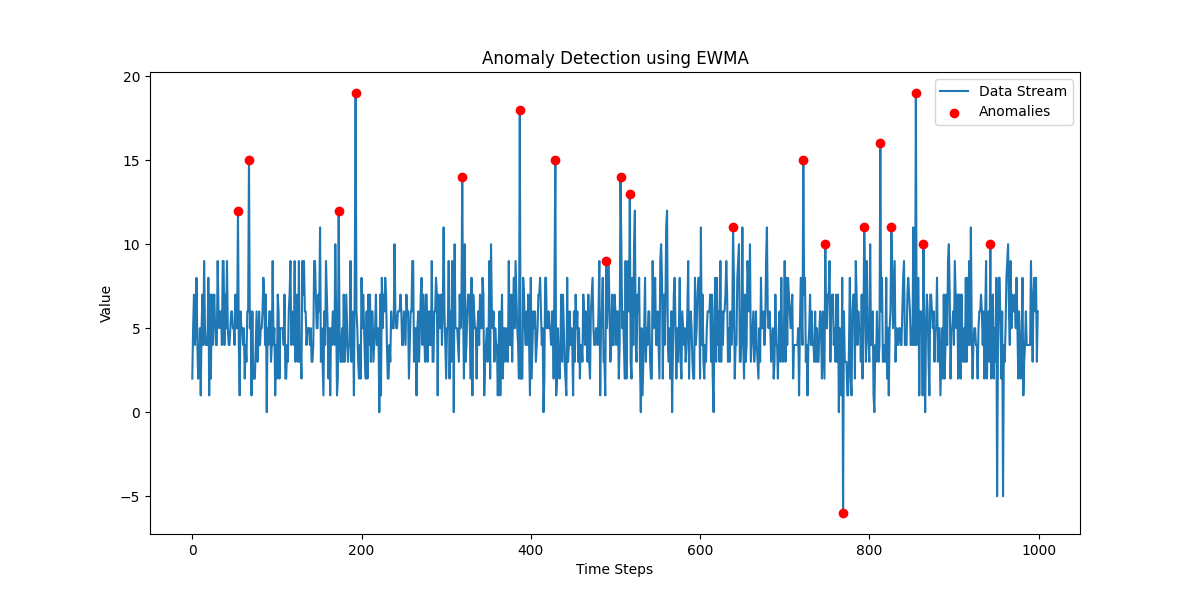

In [143]:
# Detect anomalies using EWMA method
poisson_ewma_anoms = detect_anomalies_ewma(poisson_data_with_anomalies)

# Visualize the data with anomalies using EWMA
visualize_anomalies_static(poisson_data_with_anomalies, poisson_ewma_anoms, "EWMA")


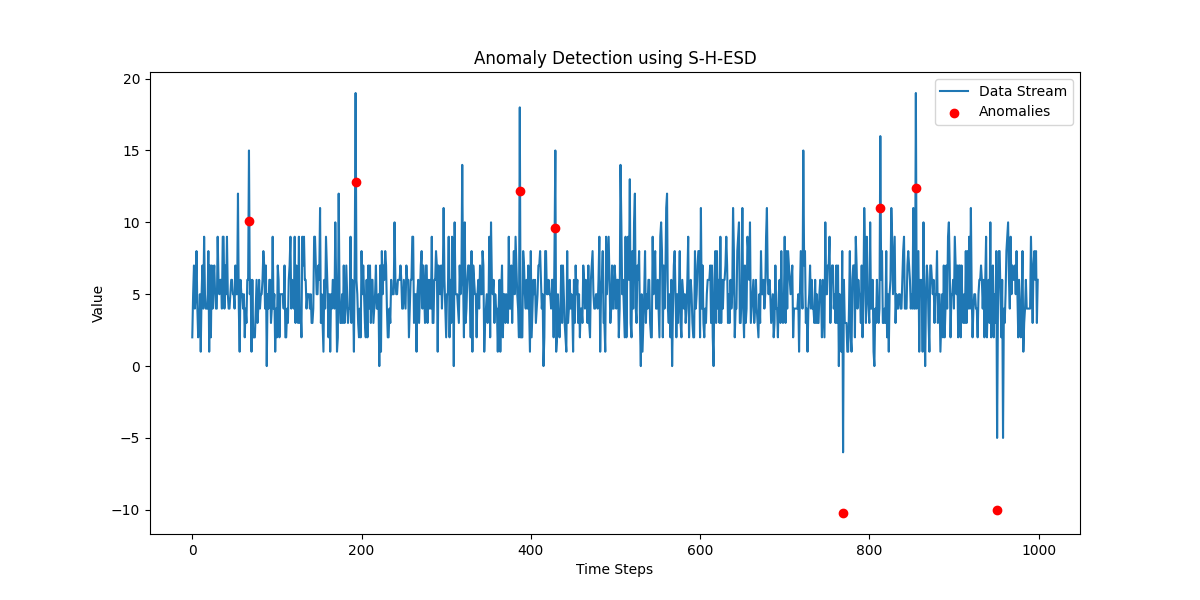

In [144]:
# Detect anomalies using S-H-ESD method
try:
    poisson_sh_esd_anoms = sh_esd(poisson_data_with_anomalies, period=100, max_anomalies=0.05)
except ValueError as e:
    print(f"Error during S-H-ESD anomaly detection: {e}")
    poisson_sh_esd_anoms = []

# Visualize the data with anomalies using S-H-ESD
visualize_anomalies_static(poisson_data_with_anomalies, poisson_sh_esd_anoms, "S-H-ESD")


## Seasonal

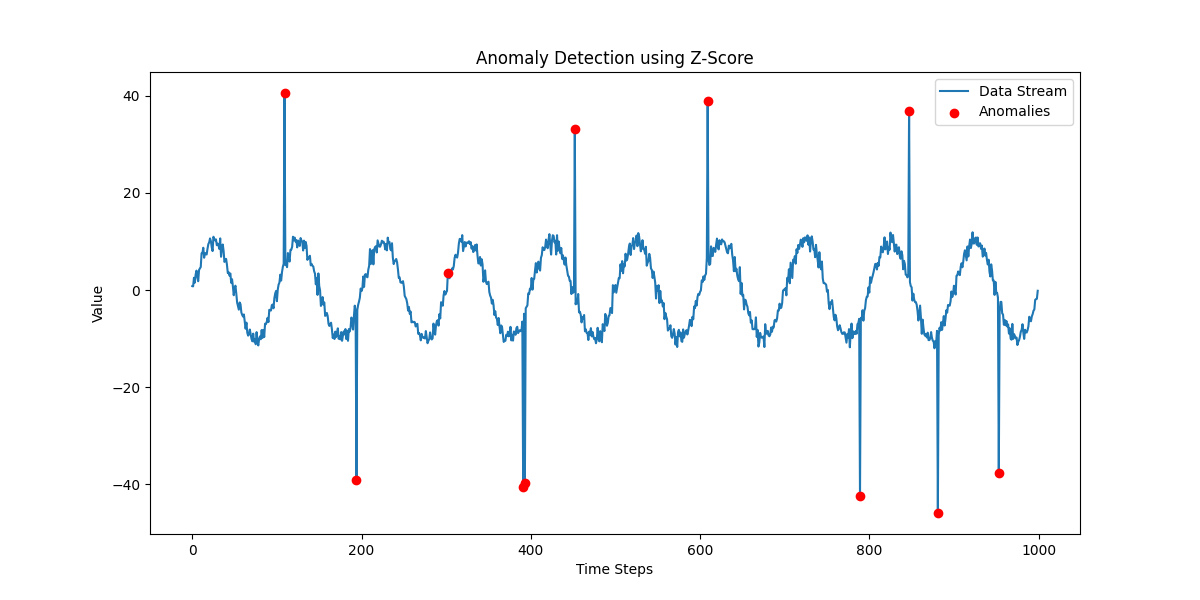

In [145]:
# Generate Seasonal Data with Noise
seasonal_data = generate_seasonal_data(steps=num_data_points)

# Add anomalies to the data
seasonal_data_with_anomalies = add_anomalies(seasonal_data, num_anomalies)

# Detect anomalies using Z-Score method
seasonal_zscore_anoms = detect_anomalies_zscore(seasonal_data_with_anomalies)

# Visualize the data with anomalies using Z-Score
visualize_anomalies_static(seasonal_data_with_anomalies, seasonal_zscore_anoms, "Z-Score")


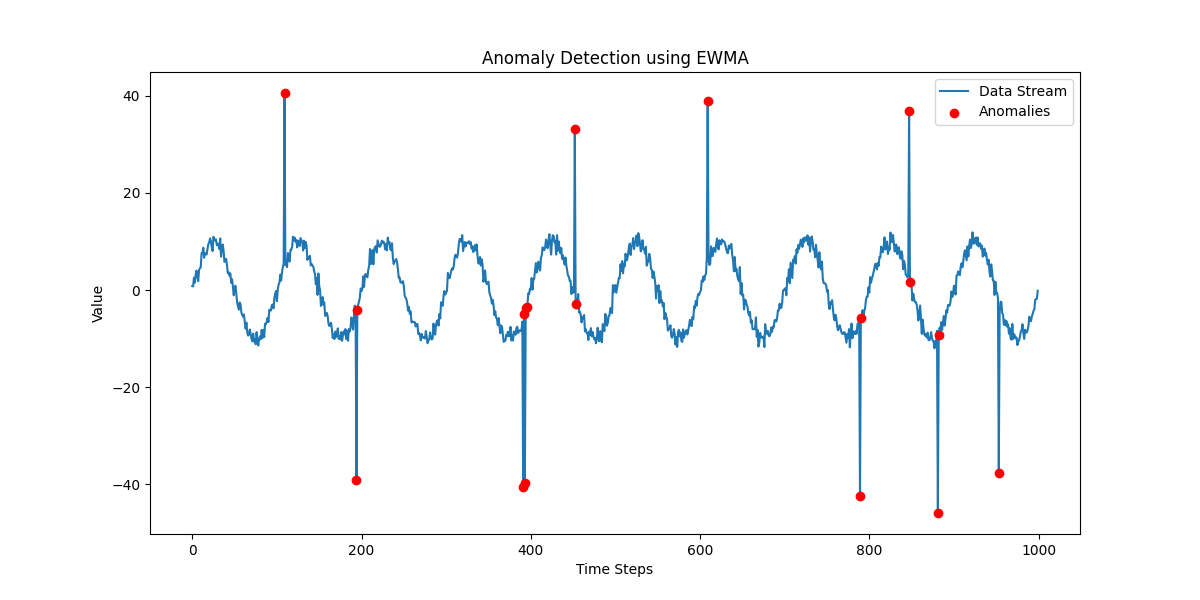

In [146]:
# Detect anomalies using EWMA method
seasonal_ewma_anoms = detect_anomalies_ewma(seasonal_data_with_anomalies)

# Visualize the data with anomalies using EWMA
visualize_anomalies_static(seasonal_data_with_anomalies, seasonal_ewma_anoms, "EWMA")


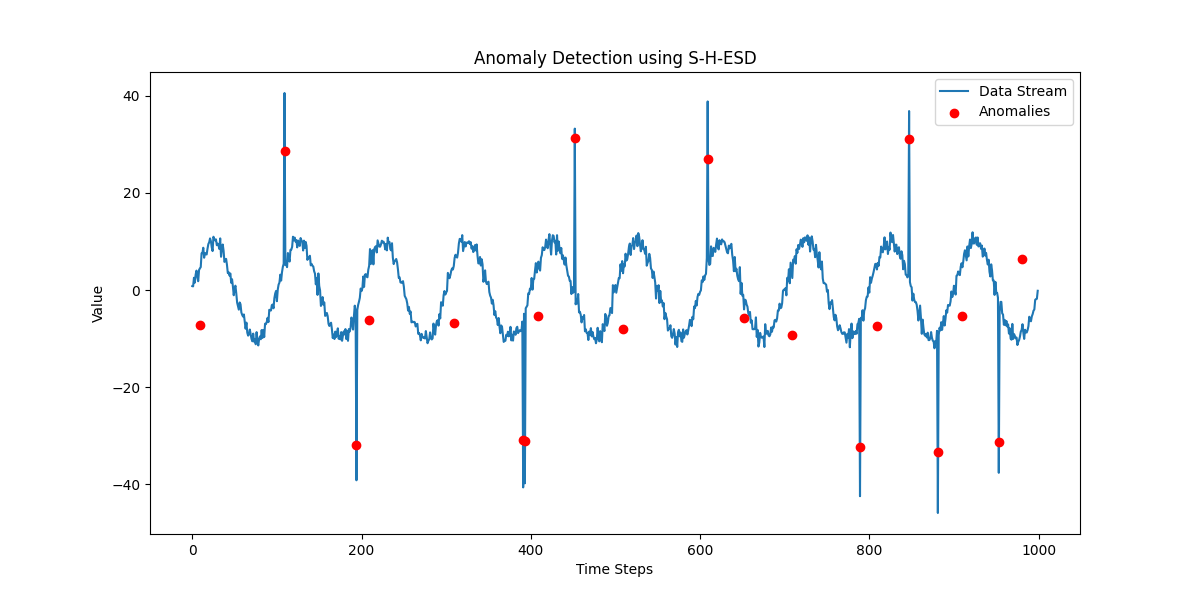

In [147]:
# Detect anomalies using S-H-ESD method
try:
    seasonal_sh_esd_anoms = sh_esd(seasonal_data_with_anomalies, period=100, max_anomalies=0.05)
except ValueError as e:
    print(f"Error during S-H-ESD anomaly detection: {e}")
    seasonal_sh_esd_anoms = []

# Visualize the data with anomalies using S-H-ESD
visualize_anomalies_static(seasonal_data_with_anomalies, seasonal_sh_esd_anoms, "S-H-ESD")


---